# Linear Regression from Scratch

Linear Regression is a supervised learning algorithm which is both a statistical and a machine learning algorithm. It is used to predict the real-valued output y based on the given input value x. It depicts the relationship between the dependent variable y and the independent variables $x^{(i)}$ ( or features ).

### Mathematical Intuition of the Algorithm
  
- The model function for linear regression is as follows:

	$$f_{w,b}(x) = wx + b$$
    
    
- To train a linear regression model, you want to find the best $(w,b)$ parameters that fits your dataset.  
    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
    	- $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
			
            $$J(\mathbf{w},b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{wb} - y^{(i)})^2$$
            
        - The choice of $(w,b)$ that fits your data, the best is the one that has the smallest cost $J(w,b)$.

- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, one can use a method called **gradient descent**. 
  - With each step of gradient descent, the parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  
    The gradient descent algorithm is:
    
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -\alpha 			\frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \newline\; & \phantom {0000} w := w -\alpha \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}\; & \newline & \rbrace\end{align*}$$ 
  
- The trained linear regression model can then take the input feature and output a prediction $f_{w,b}(x)$. 

## 1. Importing libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='rainbow')

# Stats
import scipy.stats as stats

# Toy Dataset
import sklearn.datasets
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Configuring some settings
from sklearn import set_config
set_config(display='diagram')

pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## 2. Getting the dataset

In [2]:
# Getting the dataset
diabetes_dataset = sklearn.datasets.load_diabetes()

In [3]:
# Creating a dataframe
df = pd.DataFrame(data=diabetes_dataset['data'], columns=diabetes_dataset['feature_names'])
df['Output'] = diabetes_dataset['target']
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Output
116,0.048974,0.050680,0.058463,0.070073,0.013567,0.020607,-0.021311,0.034309,0.022004,0.027917,275.0
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036056,-0.042499,171.0
340,-0.016412,-0.044642,-0.013751,0.132044,-0.009825,-0.003819,0.019187,-0.039493,-0.035817,-0.030072,216.0
53,-0.009147,-0.044642,-0.015906,0.070073,0.012191,0.022172,0.015505,-0.002592,-0.033249,0.048628,104.0
401,0.016281,-0.044642,-0.045007,-0.057314,-0.034592,-0.053923,0.074412,-0.076395,-0.042572,0.040343,93.0


## 3. Exploratory Data Analysis

### 3.1. Basic Information

In [4]:
# Getting the shape of the dataset
df.shape

(442, 11)

In [5]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Output  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
# Finding total nos. of duplicated values
df.duplicated().sum()

0

In [7]:
# Looking at the data mathematically
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Output
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Text(0.5, 1.0, 'Corelation between different features')

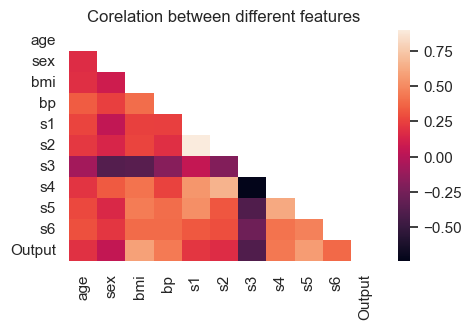

In [8]:
# Correlation between different numerical features
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask).set(facecolor = 'white')
plt.title("Corelation between different features")

### 3.2. Target feature

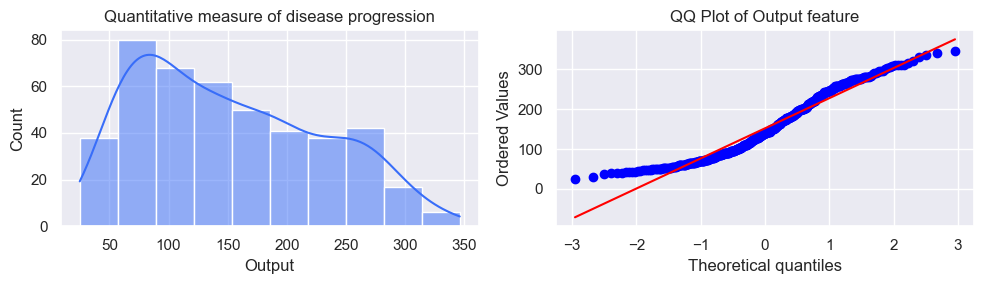

In [9]:
# Plots of Target feature
fig, ax = plt.subplots(1, 2, figsize=(10,3))
# Distribution of Target features
sns.histplot(data=df, x='Output', ax=ax[0], kde=True)
ax[0].set_title("Quantitative measure of disease progression")

# QQ Plot of Target feature
stats.probplot(df['Output'],dist='norm',plot=plt)
ax[1].set_title(f"QQ Plot of Output feature")
plt.tight_layout()

In [10]:
# Skewness & Kurtosis
print(f"Skewness: {df['Output'].skew()}")
print(f"Kurtosis: {df['Output'].kurt()}")

Skewness: 0.44056293407014124
Kurtosis: -0.8830573344098585


### 3.3. Numerical features

In [11]:
# Extracting all the numerical features
numerical_features = [feature for feature in df.select_dtypes(exclude='object').columns if feature not in ['Output']]

print(f"Total nos. of categorical features are: {len(numerical_features)}")
print("List of all categorical features are:")
numerical_features

Total nos. of categorical features are: 10
List of all categorical features are:


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
# Finding total nos. of unique values in all the numerical features
def numerical_unique_counts():
    for feature in numerical_features:
        print(f"Total nos. of unique values in {feature} feature are: {len(df[feature].unique())}")
        print()

numerical_unique_counts()

Total nos. of unique values in age feature are: 58

Total nos. of unique values in sex feature are: 2

Total nos. of unique values in bmi feature are: 163

Total nos. of unique values in bp feature are: 100

Total nos. of unique values in s1 feature are: 141

Total nos. of unique values in s2 feature are: 302

Total nos. of unique values in s3 feature are: 63

Total nos. of unique values in s4 feature are: 66

Total nos. of unique values in s5 feature are: 184

Total nos. of unique values in s6 feature are: 56



#### 3.3.1. Continuous features

In [13]:
# Extracting all the continuous features
continuous_features = [feature for feature in numerical_features if feature not in ['sex']]

print(f"Total nos. of continuous features are: {len(continuous_features)}")
print("List of all continuous features are:")
continuous_features

Total nos. of continuous features are: 9
List of all continuous features are:


['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

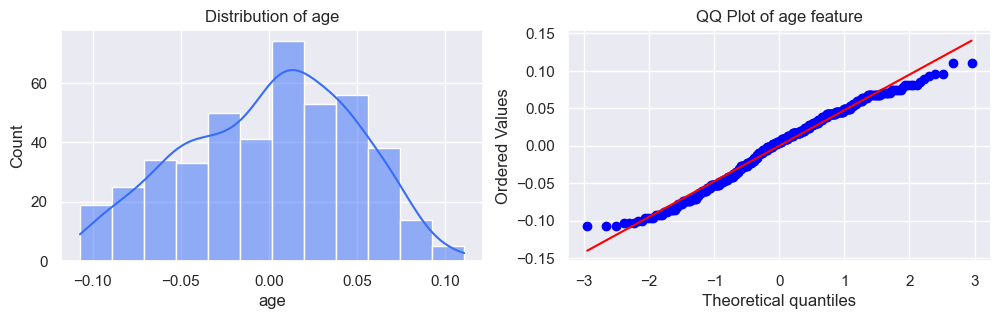

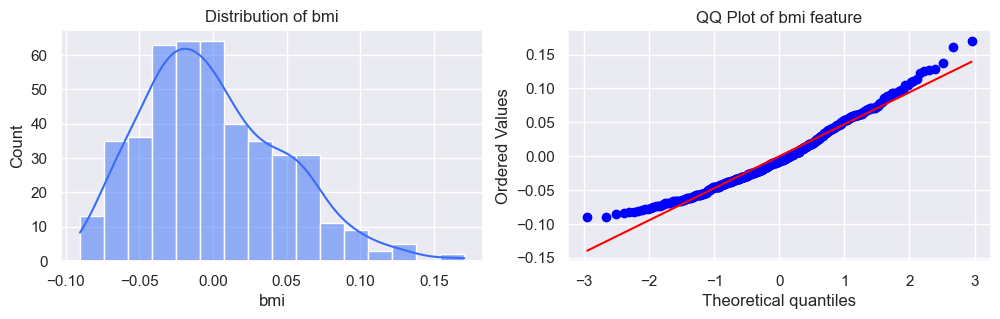

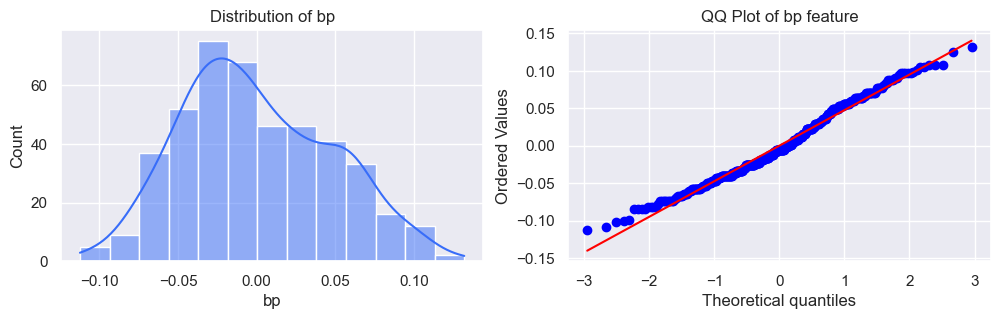

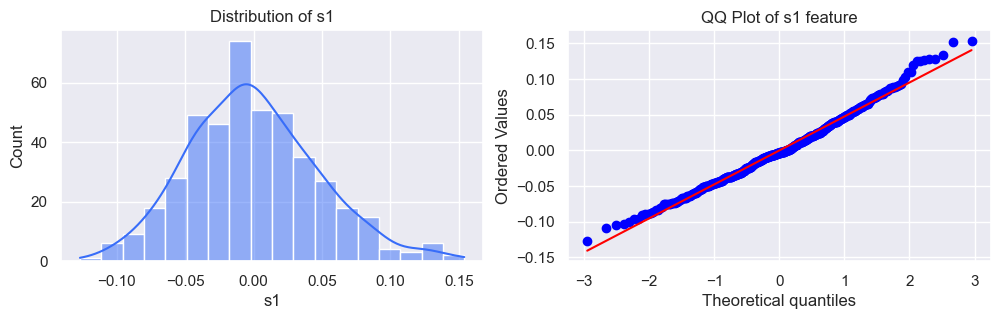

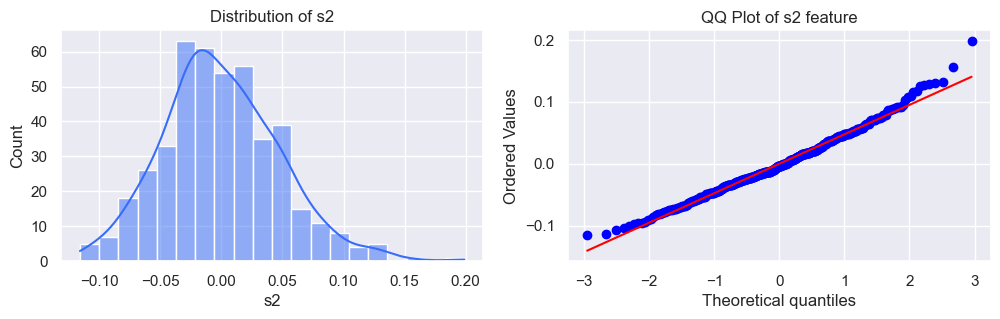

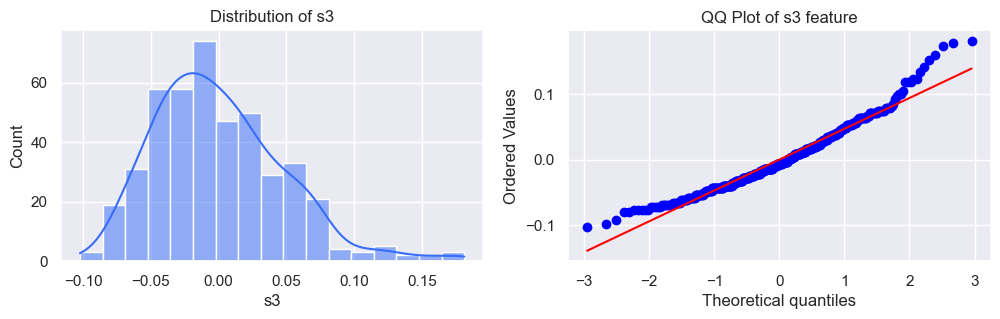

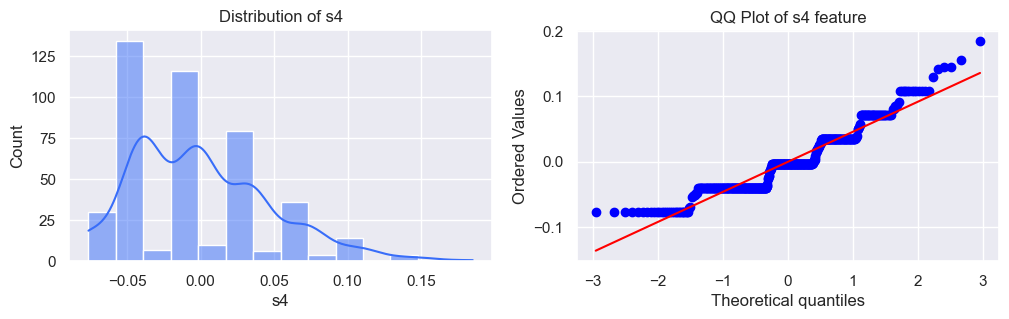

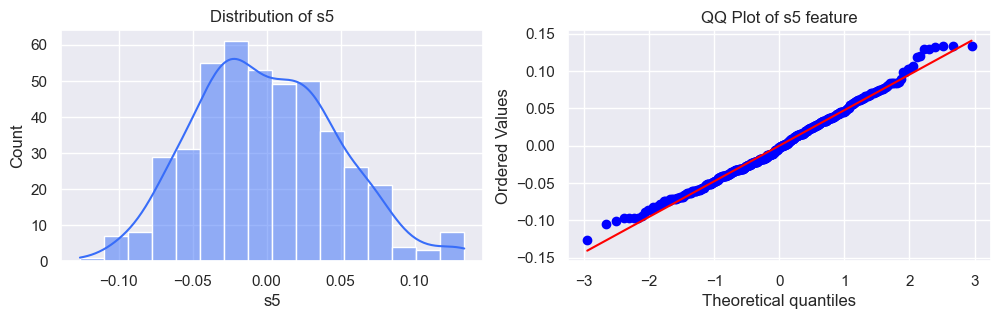

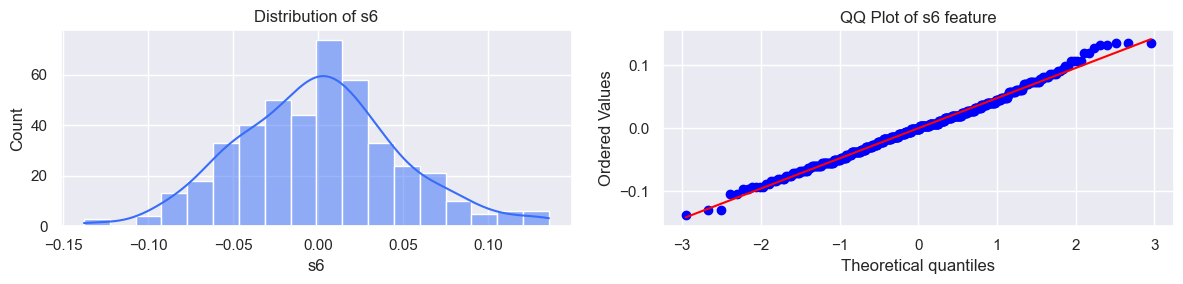

In [14]:
# Plotting distributions of continuous features
for feature in continuous_features:
    fig, ax = plt.subplots(1, 2, figsize=(12,3))
    # Distribution of continuous features
    sns.histplot(data=df, x=feature, ax=ax[0], kde=True)
    ax[0].set_title(f"Distribution of {feature}")

    # QQ Plot of continuous feature
    stats.probplot(df[feature],dist='norm',plot=plt)
    ax[1].set_title(f"QQ Plot of {feature} feature")
plt.tight_layout()

#### 3.3.2. Discrete features

Text(0.5, 1.0, 'Distribution of sex feature')

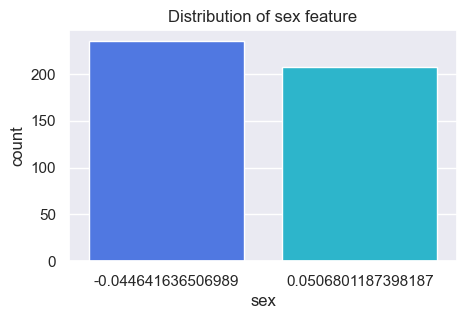

In [15]:
# Plotting distribution of discrete features
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='sex')
plt.title(f"Distribution of sex feature")

### 3.4. Missing values

In [16]:
# Checking if there are any missing values in any feature
df.isna().any().describe()

count        11
unique        1
top       False
freq         11
dtype: object

### 3.5. Outliers

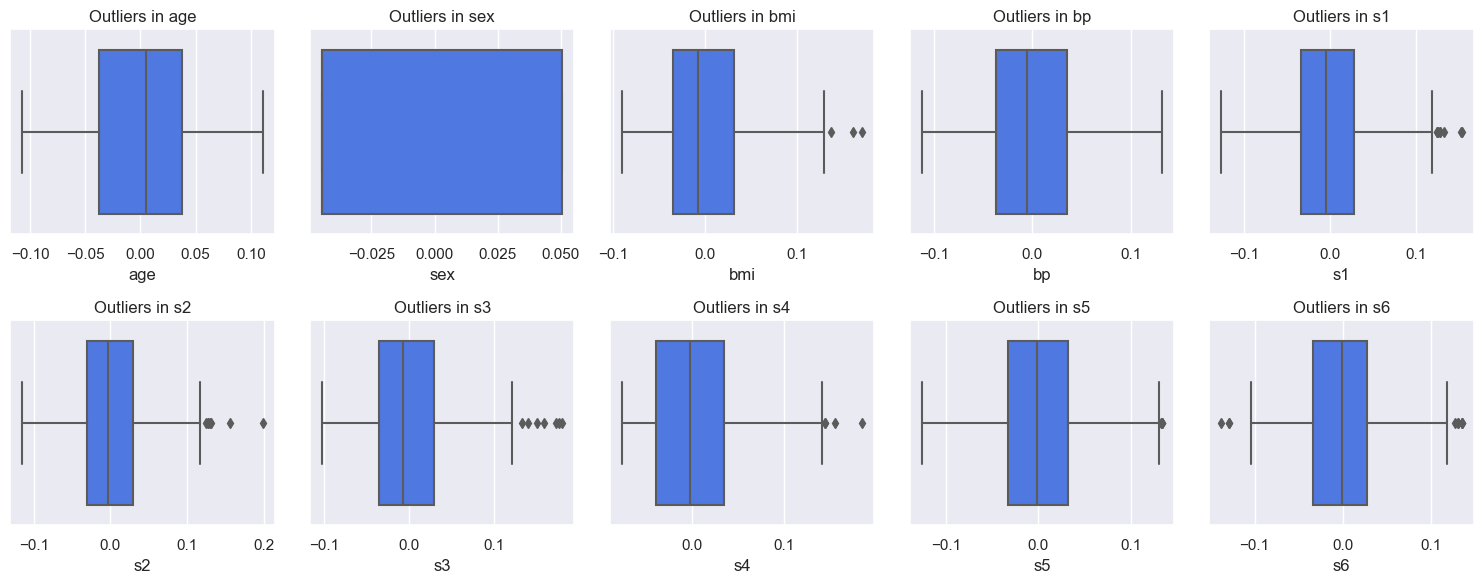

In [17]:
# Finding outliers in the numerical features
plt.figure(figsize=(15,6))
for count, feature in enumerate(numerical_features):
    ax = plt.subplot(2, 5, count+1)
    sns.boxplot(data=df, x=feature, ax=ax) 
    ax.set_title(f"Outliers in {feature}")
plt.tight_layout()

## 4. Linear Regression Model

### 4.1. Initialising the model

In [18]:
# Constructing Linear Regression Model from scratch
class LinearRegressionModel:
    def __init__(self, n_iter=1000, lr=0.01):
        # Total nos. of iterations
        self.n_iter = n_iter
        # Learning rate
        self.lr = lr
    
    def fit(self, X, y):
        # Extracting total nos. of samples & features
        self.n_samples, self.n_features = X.shape
        # Initialising weights & bias
        self.coef_ = np.zeros(self.n_features)
        self.intercept_ = 0
        
        # Optimising weights & bias
        for i in range(self.n_iter):
            # Predictions on training data
            y_pred = np.dot(X, self.coef_) + self.intercept_
            
            # Computing gradients
            dw = (1/self.n_samples) * (2 * np.dot(X.T, (y_pred - y)))
            db = (1/self.n_samples) * (2 * np.sum(y_pred - y))
            
            # Updating weights & bias
            self.coef_ -= self.lr*dw
            self.intercept_ -= self.lr*db
            
    def predict(self, X):
        # Returning predictions on test data
        return np.dot(X, self.coef_) + self.intercept_

### 4.2. Making predictions

In [19]:
# Seperating Target column from rest of the dataset
Y = df['Output']
Y.sample(5)

262    308.0
384     69.0
390    277.0
140    118.0
56      52.0
Name: Output, dtype: float64

In [20]:
# Dropping column Output from the dataset
X = df.drop(columns=['Output'])
X.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
203,-0.001882,0.050680,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025393,0.027917
338,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067
18,-0.038207,-0.044642,-0.010517,-0.036656,-0.037344,-0.019476,-0.028674,-0.002592,-0.018118,-0.017646
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011008,0.069338
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020289,-0.025930


In [21]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [22]:
# Initialising the model
model = LinearRegressionModel()

# Training the model
model.fit(X_train, y_train)

# Making predictions on test data
y_pred = model.predict(X_test)

### 4.3. Evaluating the model

In [23]:
# r2 score of the model
R2_score = r2_score(y_pred, y_test)
print(f"R2_score: {R2_score}")

# root mean squared error of the model
mse = mean_squared_error(y_pred, y_test)
print(f"Root mean squared error: {mse**(0.5)}")

R2_score: -90.21156323442952
Root mean squared error: 70.1180097684632
